# Usage of GA approach with fitness function represented by CNN

### Load CNN which will represent a fitness function & importing libraries for images

In [12]:
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import random
import os
import string
import numpy as np
import cv2

img_size = 60

# Converting to grayscale function
def rgb_2_gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

def gray_to_rgb(img):
    return np.repeat(np.reshape(img, (1, 60, 60, 1)), 3, 3)

model = load_model('cat_model.h5') # change to your model's path

### Core DNA class

In [14]:
class DNA:
    
    def __init__(self):

        self.genes = np.random.rand(img_size, img_size)
        
        self.fitness = 0
        
        
    def calculate_fitness(self):
        temp = gray_to_rgb(self.genes)
        self.fitness = model.predict(self.genes.reshape(1, img_size, img_size, 1))[0][1] + relief
         
            
    def crossover(self, partner):
        child = DNA()
        
        flatten_genes = self.genes.flatten()
        midpoint = random.choice(range(len(flatten_genes)))
        new_genes = np.append(flatten_genes[:midpoint],partner.genes.flatten()[midpoint:]) 
        
        child.genes = np.reshape(new_genes, (img_size, img_size))
        
        return child
        
    
    def mutate(self):
        shape = self.genes.shape
        for i in range(shape[0]):
            for j in range(shape[1]):
                if random.random() < mutation_rate:
                    self.genes[i, j] = random.random()
        
        
    def display(self, ax):
        ax.imshow(self.genes, cmap = plt.cm.gray)



### Defining hyperparameters

In [15]:
mutation_rate = 0.0004
total_population = 1000
relief = 0.01
survived_parents = int(total_population * 0.04)

num_of_iterations = 7000

### Whole process of algorythm

In [16]:
population = []
mating_pool = []

def setup(total_population):
    
    for i in range(total_population):
        creature = DNA()
        
        creature.calculate_fitness()
        
        population.append(creature)
        
def draw():
        
    mating_pool = []
        
    for i in range(total_population):
        n = int(population[i].fitness * 100)
        
        for _ in range(n):
            mating_pool.append(population[i])
        
    for i in range(total_population):
        
        if i in range(survived_parents): # to save some best examples
            continue
            
        parent_1 = random.choice(range(len(mating_pool)))
        parent_2 = random.choice(range(len(mating_pool)))
        
        child = mating_pool[parent_1].crossover(mating_pool[parent_2])
        
        child.mutate()
        
        population[i] = child
        population[i].calculate_fitness()
    
        

### Start

1
2
3
4
5
6
7
8
9
10

--------Best-of-iteration-10--------
Average fitness: 0.1044
Best fitness: 0.1714
3 best results:



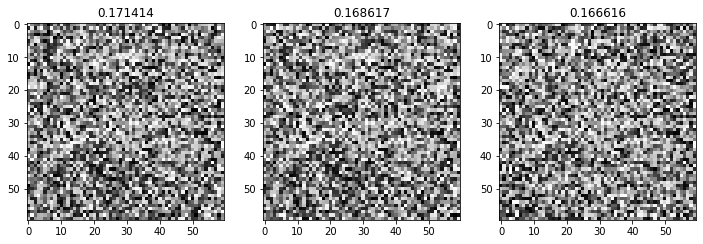

11
12
13
14
15
16
17
18
19
20

--------Best-of-iteration-20--------
Average fitness: 0.1562
Best fitness: 0.2303
3 best results:



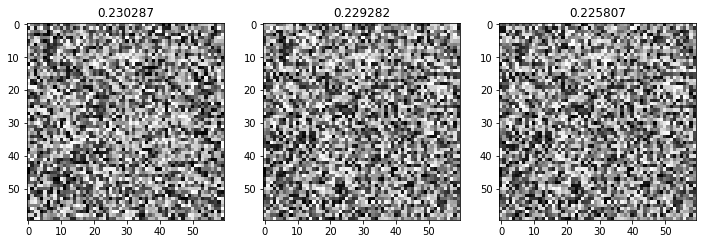

21
22
23
24
25
26
27
28
29
30

--------Best-of-iteration-30--------
Average fitness: 0.2081
Best fitness: 0.2883
3 best results:



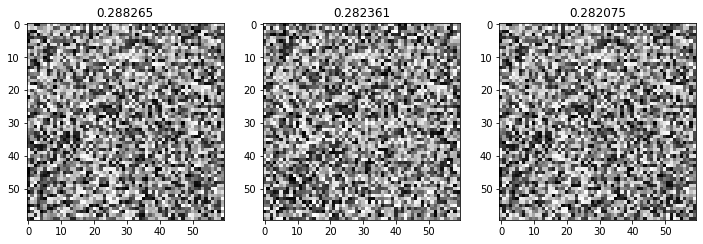

31
32
33
34
35
36
37
38
39
40

--------Best-of-iteration-40--------
Average fitness: 0.2497
Best fitness: 0.3359
3 best results:



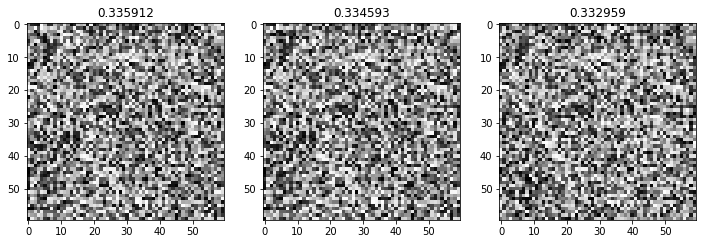

41
42
43
44
45
46
47
48
49
50

--------Best-of-iteration-50--------
Average fitness: 0.295
Best fitness: 0.3721
3 best results:



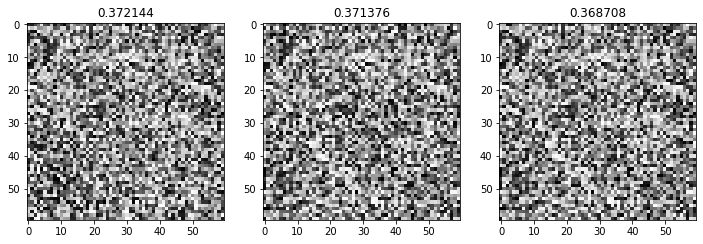

51
52
53
54
55
56
57
58
59
60

--------Best-of-iteration-60--------
Average fitness: 0.3309
Best fitness: 0.4139
3 best results:



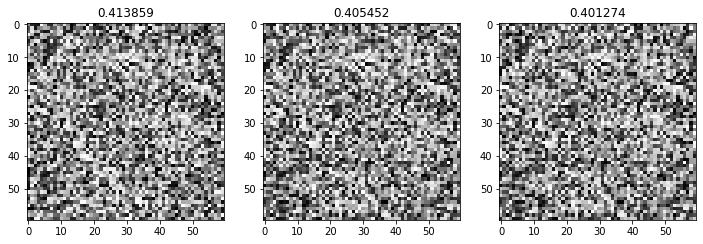

61
62
63
64
65
66
67
68
69


KeyboardInterrupt: 

In [17]:
setup(total_population)

best_fitness = 0
avg_fitness = 0

for i in range(1, num_of_iterations + 1):
    print(i)    
    draw()
    population.sort(key=lambda c: c.fitness, reverse=True)
    
    fitness = [c.fitness for c in population]
    
    if best_fitness < fitness[0]:
        best_fitness = fitness[0]
    
    if i % 10 == 0:
        print('\n--------Best-of-iteration-'+ str(i) +'--------')
        
        print('Average fitness: ' + str(round(sum(fitness)/len(fitness), 4)))
        print('Best fitness: ' + str(round(best_fitness, 4)))
        print('3 best results:\n')
        
        fig, axs = plt.subplots(nrows = 1, ncols=3, figsize=(12,12))
        
        for j in range(3):
            axs[j].set_title(round(population[j].fitness, 6))
            population[j].display(axs[j])
        
        plt.show()

### View custom pictures

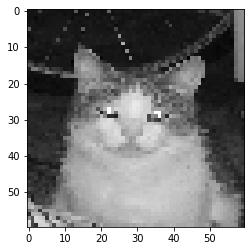

In [13]:
path_to_your_pic = 'sample.jpg' # try your own pics

photo = load_img(path_to_your_pic, target_size=(img_size, img_size))
photo = img_to_array(photo)
photo = rgb_2_gray(photo)
photo = photo / 255
plt.imshow(photo, cmap = plt.cm.gray)